In [1]:
import pandas as pd
import numpy as np
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder


C:\Users\mka\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#lire le dataframe
data=pd.read_csv('Expresso_churn_dataset.csv')
data

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0


In [3]:
# Créer un rapport de profilage avec pandas-profiling
#profile = ProfileReport(data)
#profile.to_file("Expression.html")

In [4]:
#gerer les valeurs manquantes et corrompus
data.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [5]:
#remplacer les valeurs nulles
col_to_fill=['REGION','MONTANT','FREQUENCE_RECH','REVENUE','ARPU_SEGMENT','FREQUENCE','DATA_VOLUME','DATA_VOLUME','ON_NET','ORANGE','TIGO','ZONE1','ZONE2','TOP_PACK','FREQ_TOP_PACK']
for col in col_to_fill:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Vérifiez s'il reste des valeurs manquantes
data.isnull().sum()

C:\Users\mka\AppData\Local\Temp\ipykernel_14724\3887572690.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)


user_id           0
REGION            0
TENURE            0
MONTANT           0
FREQUENCE_RECH    0
REVENUE           0
ARPU_SEGMENT      0
FREQUENCE         0
DATA_VOLUME       0
ON_NET            0
ORANGE            0
TIGO              0
ZONE1             0
ZONE2             0
MRG               0
REGULARITY        0
TOP_PACK          0
FREQ_TOP_PACK     0
CHURN             0
dtype: int64

In [6]:
#Supprimer les doublons, s'ils existent
data.duplicated().sum()
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

In [7]:
#remplacer les NaN par des zeros
data.fillna(0,inplace=True)
data

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,DAKAR,I 18-21 month,500.0,1.0,500.0,167.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NO,4,All-net 500F=2000F;5d,1.0,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,DAKAR,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,0.0,90.0,46.0,7.0,0.0,0.0,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,0.0,0.0,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,0.0,39.0,24.0,1.0,0.0,0.0,NO,11,Mixt 250F=Unlimited_call24H,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,ffffe85215ddc71a84f95af0afb0deeea90e6967,DAKAR,K > 24 month,500.0,1.0,500.0,167.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NO,6,All-net 500F=2000F;5d,1.0,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,0.0,0.0,NO,55,"Data: 200 F=100MB,24H",9.0,0
2154045,fffff172fda1b4bb38a95385951908bb92379809,DAKAR,K > 24 month,500.0,1.0,500.0,167.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,NO,1,All-net 500F=2000F;5d,1.0,1
2154046,fffff5911296937a37f09a37a549da2e0dad6dbb,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,0.0,0.0,140.0,13.0,0.0,0.0,NO,28,All-net 500F=2000F;5d,12.0,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [9]:
# Création de l'objet LabelEncoder
encoder = LabelEncoder()

# Liste des colonnes à traiter
columns_to_fill = ['TOP_PACK','MRG','user_id','REGION','TENURE']

# Encodage des variables catégorielles avec LabelEncoder
for col in columns_to_fill:
    data[col] = encoder.fit_transform(data[col])

# Vérification des informations sur le dataset après l'encodage
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         int32  
 1   REGION          int32  
 2   TENURE          int32  
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             int32  
 15  REGULARITY      int64  
 16  TOP_PACK        int32  
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int32(5), int64(2)
memory usage: 271.2 MB


# former et tester un classificateur d'apprentissage automatique


In [10]:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns






In [11]:
# Séparer les données en features et target
X = data.drop(columns=['CHURN'])  # Features
y = data['CHURN']  # Target variable

In [12]:
# Initialisation du LabelEncoder
encoder = LabelEncoder()

# Liste des colonnes catégorielles à encoder
categorical_columns = ['REGION', 'TOP_PACK']  # Ajoutez toutes les colonnes catégorielles pertinentes ici
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col].astype(str))


In [13]:

# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:

# Initialisation du modèle d'arbre de décision
dt_clf = DecisionTreeClassifier(random_state=42)

In [15]:

#Entraînement du modèle sur l'ensemble d'entraînement
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [16]:
# Prédiction sur l'ensemble de test
y_pred_dt = dt_clf.predict(X_test)

In [17]:
# Évaluation du modèle de forêt aléatoire
print("Forêt Aléatoire")
print(f'Accuracy: {accuracy_score(y_test, y_pred_dt):.2f}')
print(classification_report(y_test, y_pred_dt))

Forêt Aléatoire
Accuracy: 0.82
              precision    recall  f1-score   support

           0       0.89      0.89      0.89    349773
           1       0.52      0.53      0.53     81037

    accuracy                           0.82    430810
   macro avg       0.71      0.71      0.71    430810
weighted avg       0.82      0.82      0.82    430810



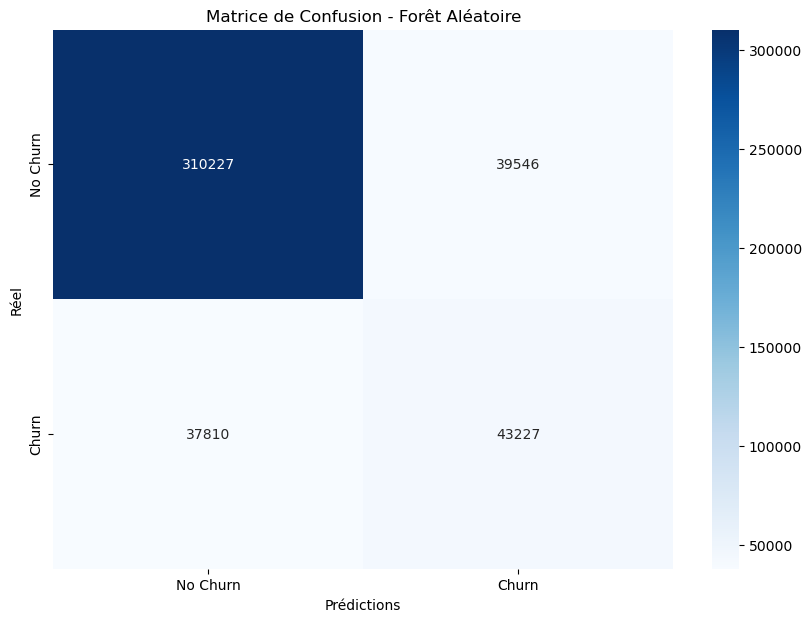

In [18]:

# Matrice de confusion pour la forêt aléatoire
cm_rf = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Prédictions')
plt.ylabel('Réel')
plt.title('Matrice de Confusion - Forêt Aléatoire')
plt.show()


# sauvegarde

In [19]:

import joblib



In [20]:

# Entraîner et sauvegarder les modèles
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
joblib.dump(dt_clf, 'decision_tree_model.pkl')




['decision_tree_model.pkl']